# <h1 align=center> **PROYECTO INDIVIDUAL N°2 (EDA)** </h1>

In [189]:
# Convoco librerias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import gmaps
import gmaps.datasets
import numpy as np

# Importo los datasets para iniciar el analisis.

In [190]:
# Cargo los  archivos CSV en un DataFrame.
df_siniestros_hechos = pd.read_csv(r"D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL II\DATASETS\df_siniestros_hechos.csv")
df_siniestros_victimas = pd.read_csv(r"D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL II\DATASETS\df_siniestros_victimas.csv")

In [191]:
print(df_siniestros_hechos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     696 non-null    object 
 1   n_victimas             696 non-null    int64  
 2   fecha                  696 non-null    object 
 3   hh                     695 non-null    float64
 4   tipo_de_calle          696 non-null    object 
 5   dirección normalizada  688 non-null    object 
 6   comuna                 696 non-null    int64  
 7   longitud               684 non-null    float64
 8   latitud                684 non-null    float64
 9   victima                696 non-null    object 
 10  acusado                696 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 59.9+ KB
None


In [205]:
# Unifico los DataFrames usando el campo en común 'id'.
df_siniestros = pd.merge(df_siniestros_hechos, df_siniestros_victimas, on='id', how='inner')

# Corrijo tipo de variable en campo "HH".

# Reemplazo los valores no válidos (NaN o inf) en el campo 'hh' con un valor específico, por ejemplo, -1.
df_siniestros['hh'].fillna(-1, inplace=True)

# Convierto el campo 'hh' a tipo entero.
df_siniestros['hh'] = df_siniestros['hh'].astype(int)
# Identifico y tratar valores no finitos.
df_siniestros['edad'] = pd.to_numeric(df_siniestros['edad'], errors='coerce')

df_siniestros['edad'].fillna(0, inplace=True)

df_siniestros['edad'] = df_siniestros['edad'].astype(int)

df_siniestros.drop(columns=['fecha_fallecimiento'], inplace=True)
df_siniestros.drop(columns=['fecha_y'], inplace=True)
df_siniestros.rename(columns={'fecha_x': 'fecha'}, inplace=True)
df_siniestros.rename(columns={'victima_x': 'victima_1'}, inplace=True)
df_siniestros.rename(columns={'victima_y': 'victima_2'}, inplace=True)
df_siniestros.rename(columns={'hh':'hora'}, inplace=True)

df_siniestros.head()

,id,n_victimas,fecha,hora,tipo_de_calle,dirección normalizada,comuna,longitud,latitud,victima_1,acusado,rol,victima_2,sexo,edad
0,2016-0001,1,2016-01-01,4,avenida,"piedra buena av. y fernandez de la cruz, f., g...",8,-58.475340,-34.687570,moto,auto,conductor,moto,masculino,19
1,2016-0002,1,2016-01-02,1,autopista,"paz, gral. av. y de los corrales av.",9,-58.508775,-34.669777,auto,pasajeros,conductor,auto,masculino,70
2,2016-0003,1,2016-01-03,7,avenida,entre rios av. 2034,1,-58.390403,-34.631894,moto,auto,conductor,moto,masculino,30
3,2016-0004,1,2016-01-10,0,avenida,"larrazabal av. y villegas, conrado, gral.",8,-58.465039,-34.680930,moto,sd,conductor,moto,masculino,18
4,2016-0005,1,2016-01-21,5,avenida,"san juan av. y saenz peã‘a, luis, pres.",1,-58.387183,-34.622466,moto,pasajeros,conductor,moto,masculino,29


In [206]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     717 non-null    object 
 1   n_victimas             717 non-null    int64  
 2   fecha                  717 non-null    object 
 3   hora                   717 non-null    int32  
 4   tipo_de_calle          717 non-null    object 
 5   dirección normalizada  708 non-null    object 
 6   comuna                 717 non-null    int64  
 7   longitud               704 non-null    float64
 8   latitud                704 non-null    float64
 9   victima_1              717 non-null    object 
 10  acusado                717 non-null    object 
 11  rol                    706 non-null    object 
 12  victima_2              708 non-null    object 
 13  sexo                   711 non-null    object 
 14  edad                   717 non-null    int32  
dtypes: flo

In [208]:
# Guardo el dataset unificado.
df_siniestros.to_csv(r'D:\Users\Arnaldo\Desktop\SISTEMAS\SOYHENRY\CURSO\PROYECTOS\PROYECTO INDIVIDUAL II\DATASETS\df_siniestros.csv', index=False)

## Exploración de valores faltantes

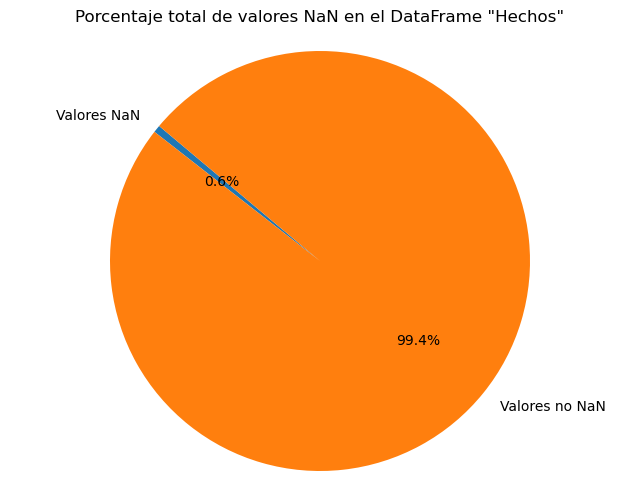

In [209]:
# Determino porcentaje de valores faltantes en df "hechos".

total_nan_percentage = (df_siniestros.isna().sum().sum() / df_siniestros.size) * 100

# Creo el gráfico de torta.
plt.figure(figsize=(8, 6))
plt.pie([total_nan_percentage, 100 - total_nan_percentage],
        labels=['Valores NaN', 'Valores no NaN'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Porcentaje total de valores NaN en el DataFrame "Hechos"')
plt.axis('equal') 
plt.show()

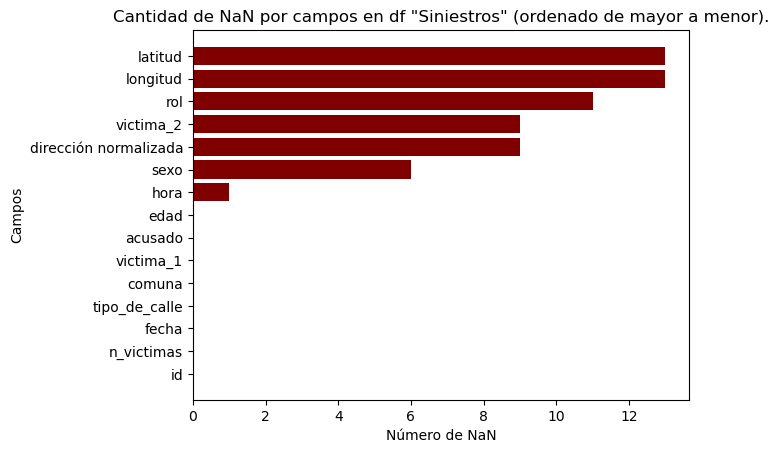

In [210]:
# Calculo la suma total de NaN por columna.
nan_counts = df_siniestros.isna().sum()

# Sumar también los valores -1
nan_counts += (df_siniestros == -1).sum()

# Ordenar los campos de menor a mayor
nan_counts_sorted = nan_counts.sort_values()

# Creo una lista de colores
colors = ['blue' if val == 0 else 'maroon' for val in nan_counts_sorted]

# Creo el gráfico de barras horizontales.
plt.barh(range(len(nan_counts_sorted)), nan_counts_sorted, color=colors)

# Configuro el título y las etiquetas de los ejes.
plt.yticks(range(len(nan_counts_sorted)), nan_counts_sorted.index)
plt.xlabel('Número de NaN')
plt.ylabel('Campos')
plt.title('Cantidad de NaN por campos en df "Siniestros" (ordenado de mayor a menor).')

# Muestro el gráfico
plt.show()



## Exploración de valores atípicos/extremos (outliers)

Conclusión para df_siniestros:
Se detectaron outliers en algunas de las variables numéricas del conjunto de datos.
Tras aplicar el filtro de outliers, se observa una reducción en la dispersión de los datos.
Esto sugiere que los valores extremos pueden estar afectando la interpretación de los datos.


c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

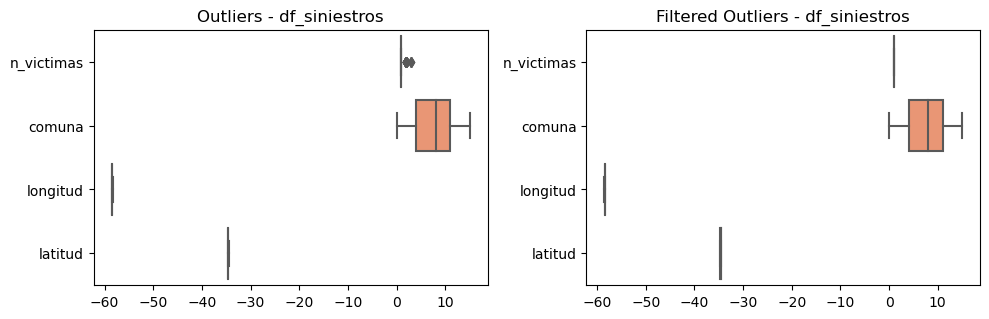

In [211]:
# Seleccionar solo las columnas numéricas para df_siniestros.
numeric_cols_hechos = df_siniestros.select_dtypes(include=['int64', 'float64'])

# Método de los cuartiles (IQR) para detectar outliers en df_siniestros.
Q1_hechos = numeric_cols_hechos.quantile(0.25)
Q3_hechos = numeric_cols_hechos.quantile(0.75)
IQR_hechos = Q3_hechos - Q1_hechos
lower_bound_hechos = Q1_hechos - 1.5 * IQR_hechos
upper_bound_hechos = Q3_hechos + 1.5 * IQR_hechos

# Filtrar outliers en df_siniestros.
outliers_hechos = numeric_cols_hechos[~((numeric_cols_hechos < lower_bound_hechos) | (numeric_cols_hechos > upper_bound_hechos)).any(axis=1)]

# Visualizo resultados para df_siniestros.
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.boxplot(data=numeric_cols_hechos, orient="h", palette="Set2")
plt.title("Outliers - df_siniestros")

plt.subplot(2, 2, 2)
sns.boxplot(data=outliers_hechos, orient="h", palette="Set2")
plt.title("Filtered Outliers - df_siniestros")

# Conclusiones para df_siniestros.
print("Conclusión para df_siniestros:")
print("Se detectaron outliers en algunas de las variables numéricas del conjunto de datos.")
print("Tras aplicar el filtro de outliers, se observa una reducción en la dispersión de los datos.")
print("Esto sugiere que los valores extremos pueden estar afectando la interpretación de los datos.")

plt.tight_layout()
plt.show()


In [212]:
# Método de los cuartiles (IQR) para detectar outliers en df_siniestros
Q1_hechos = df_siniestros["n_victimas"].quantile(0.25)
Q3_hechos = df_siniestros["n_victimas"].quantile(0.75)
IQR_hechos = Q3_hechos - Q1_hechos

# Definir los límites para identificar los outliers.
lower_bound_hechos = Q1_hechos - 1.5 * IQR_hechos
upper_bound_hechos = Q3_hechos + 1.5 * IQR_hechos

# Filtrar los outliers en df_siniestros.
outliers_hechos = df_siniestros[(df_siniestros["n_victimas"] < lower_bound_hechos) | (df_siniestros["n_victimas"] > upper_bound_hechos)]

# Método de los cuartiles (IQR) para detectar outliers en df_siniestros.
Q1_victimas = df_siniestros["edad"].quantile(0.25)
Q3_victimas = df_siniestros["edad"].quantile(0.75)
IQR_victimas = Q3_victimas - Q1_victimas

# Definir los límites para identificar los outliers.
lower_bound_victimas = Q1_victimas - 1.5 * IQR_victimas
upper_bound_victimas = Q3_victimas + 1.5 * IQR_victimas

# Filtro los outliers en df_siniestros.
outliers_victimas = df_siniestros[(df_siniestros["edad"] < lower_bound_victimas) | (df_siniestros["edad"] > upper_bound_victimas)]

# Imprimo los resultados
print("Outliers en df_siniestros:")
print(outliers_hechos)
print("\nOutliers en df_siniestros:")
print(outliers_victimas)


Outliers en df_siniestros:
            id  n_victimas       fecha  hora tipo_de_calle  \
29   2016-0041           2  2016-03-29    11       avenida   
30   2016-0041           2  2016-03-29    11       avenida   
98   2016-0126           2  2016-09-18    22         calle   
99   2016-0126           2  2016-09-18    22         calle   
163  2017-0026           2  2017-02-26     5       avenida   
164  2017-0026           2  2017-02-26     5       avenida   
173  2017-0035           3  2017-03-23     5       avenida   
174  2017-0035           3  2017-03-23     5       avenida   
175  2017-0035           3  2017-03-23     5       avenida   
176  2017-0036           2  2017-03-29    18     autopista   
177  2017-0036           2  2017-03-29    18     autopista   
186  2017-0050           2  2017-04-28    11     autopista   
187  2017-0050           2  2017-04-28    11     autopista   
237  2017-0108           2  2017-09-02     4     autopista   
238  2017-0108           2  2017-09-02     

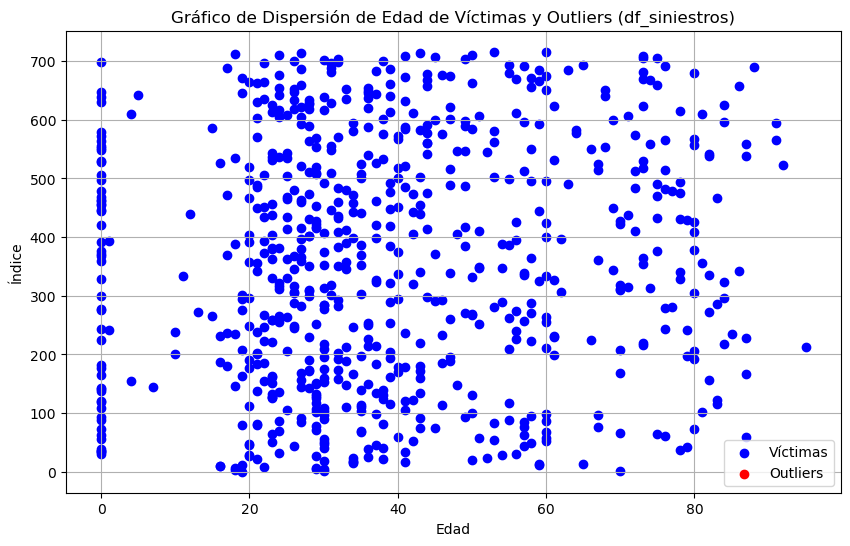

In [213]:
# Gráfico de dispersión para los outliers en df_siniestros.
plt.figure(figsize=(10, 6))
plt.scatter(df_siniestros["edad"], range(len(df_siniestros)), color='blue', label='Víctimas')
plt.scatter(outliers_victimas["edad"], outliers_victimas.index, color='red', label='Outliers')
plt.title('Gráfico de Dispersión de Edad de Víctimas y Outliers (df_siniestros)')
plt.xlabel('Edad')
plt.ylabel('Índice')
plt.legend()
plt.grid(True)
plt.show()


In [214]:
# Identifico  outliers en los campos no numéricos de df_siniestros.
outliers_hechos_categorias = pd.DataFrame()

for column in df_siniestros.select_dtypes(include=['object']):

    counts = df_siniestros[column].dropna().replace('', np.nan).replace('NaN', np.nan).value_counts()
    # Identifico valores que son considerados outliers (en este caso, aquellos que aparecen muy pocas veces).
    outliers = counts[counts < 10]
    if not outliers.empty:
        outliers_hechos_categorias[column] = outliers

# Visualizar los outliers encontrados.
print("Outliers en df_siniestros:")
print(outliers_hechos_categorias)


Outliers en df_siniestros:
           id  fecha  dirección normalizada  victima_1  acusado  victima_2
id                                                                        
2017-0035   3    NaN                    NaN        NaN      NaN        NaN
2017-0050   2    NaN                    NaN        NaN      NaN        NaN
2016-0041   2    NaN                    NaN        NaN      NaN        NaN
2018-0015   2    NaN                    NaN        NaN      NaN        NaN
2020-0063   2    NaN                    NaN        NaN      NaN        NaN
...        ..    ...                    ...        ...      ...        ...
2017-0115   1    NaN                    NaN        NaN      NaN        NaN
2017-0116   1    NaN                    NaN        NaN      NaN        NaN
2017-0118   1    NaN                    NaN        NaN      NaN        NaN
2017-0120   1    NaN                    NaN        NaN      NaN        NaN
2021-0097   1    NaN                    NaN        NaN      NaN        Na

### Analisis de los campos

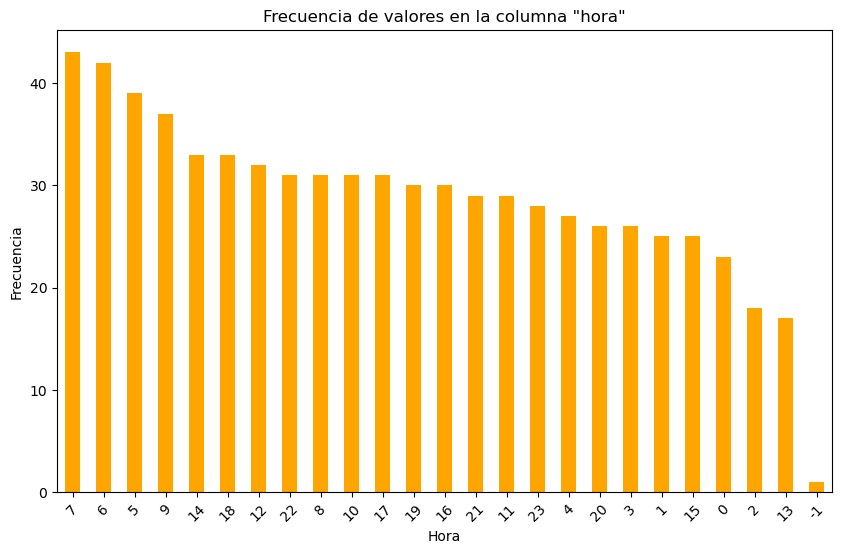

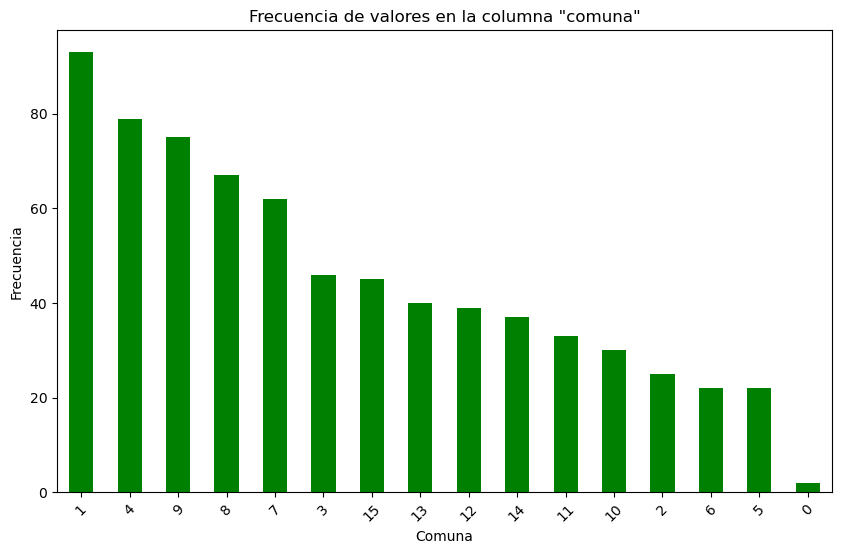

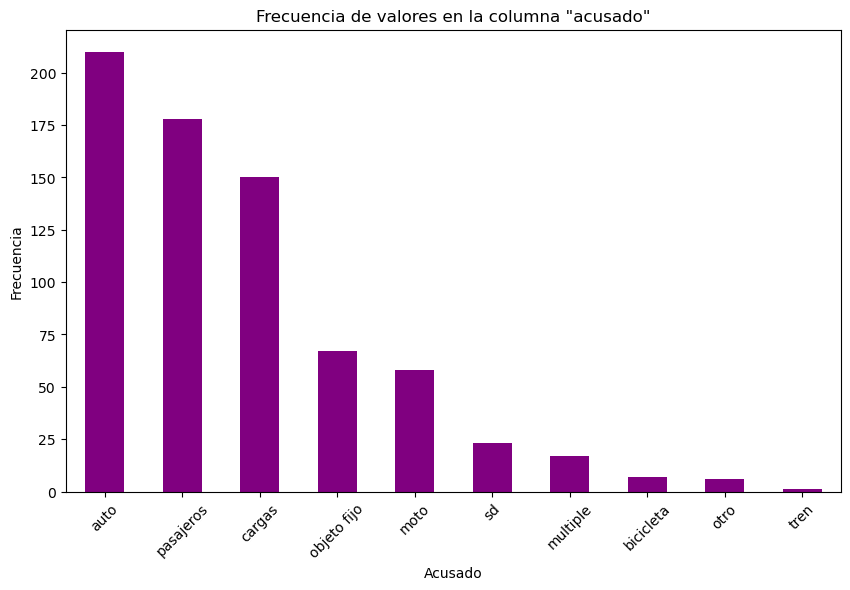

In [216]:
# Gráfico de barras para la frecuencia de valores en 'hh'.
plt.figure(figsize=(10, 6))
df_siniestros['hora'].value_counts().plot(kind='bar', color='orange')
plt.title('Frecuencia de valores en la columna "hora"')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para la frecuencia de valores en 'comuna'.
plt.figure(figsize=(10, 6))
df_siniestros['comuna'].value_counts().plot(kind='bar', color='green')
plt.title('Frecuencia de valores en la columna "comuna"')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para la frecuencia de valores en 'acusado'.
plt.figure(figsize=(10, 6))
df_siniestros['acusado'].value_counts().plot(kind='bar', color='purple')
plt.title('Frecuencia de valores en la columna "acusado"')
plt.xlabel('Acusado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



## Análisis de variables temporales.

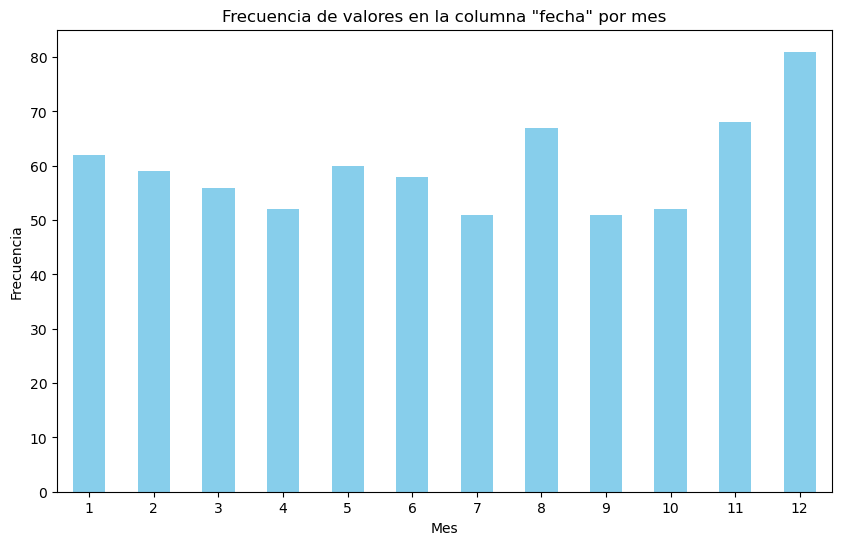

In [217]:
df_siniestros['fecha'] = pd.to_datetime(df_siniestros['fecha'])

# Extraigo el mes de cada fecha.
df_siniestros['mes'] = df_siniestros['fecha'].dt.month

# Gráfico de barras para la frecuencia de valores en 'fecha' dividido por mes.
plt.figure(figsize=(10, 6))
df_siniestros['mes'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de valores en la columna "fecha" por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


## Análisis de género y edad de las víctimas

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: edad, dtype: float64


c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Arnaldo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


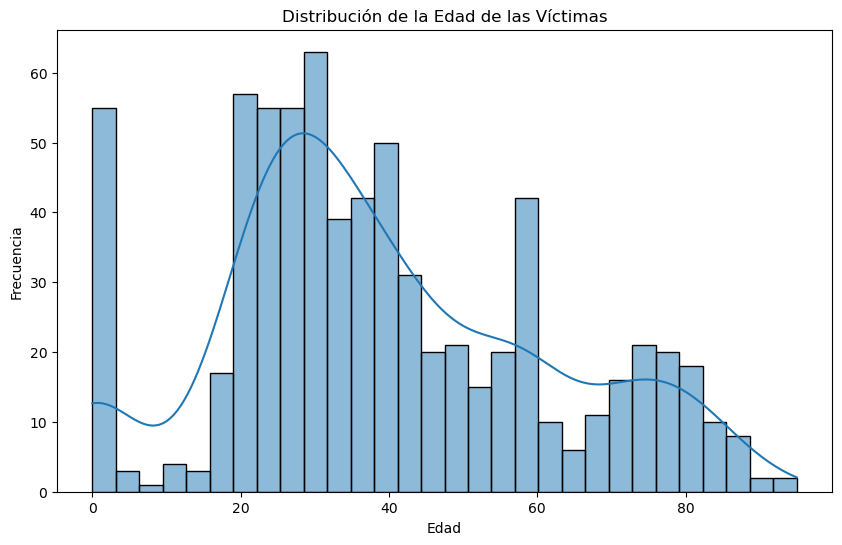

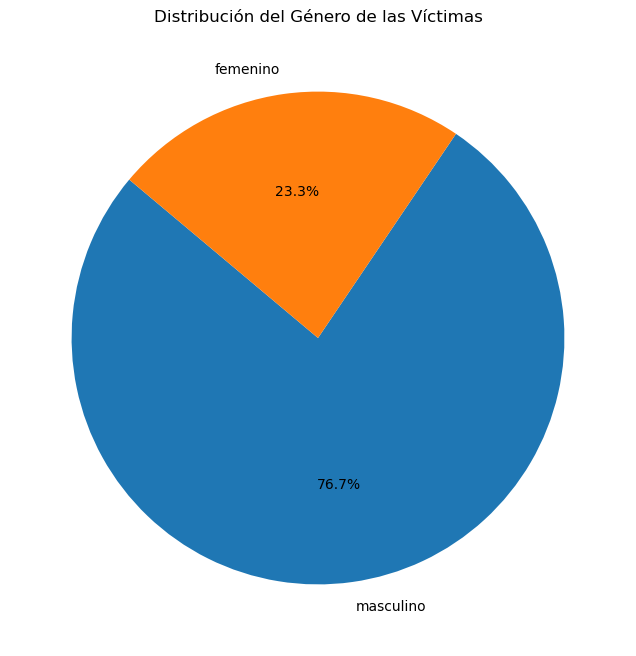

In [218]:
# Estadísticas descriptivas sobre la edad de las víctimas
print(df_siniestros['edad'].describe())
# Gráfico de barras para la frecuencia de valores en 'edad'
# Visualizo la distribución de la columna numérica "edad" con un histograma.
plt.figure(figsize=(10, 6))
sns.histplot(df_siniestros['edad'], bins=30, kde=True)
plt.title('Distribución de la Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Comparo la distribución de género de las víctimas.
# Calculo la distribución del género de las víctimas.
gender_distribution = df_siniestros['sexo'].value_counts()

# Visualizo la distribución del género de las víctimas como un gráfico de torta.
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Género de las Víctimas')
plt.ylabel('')
plt.show()


## Análisis de la comuna y su relación con los siniestros:

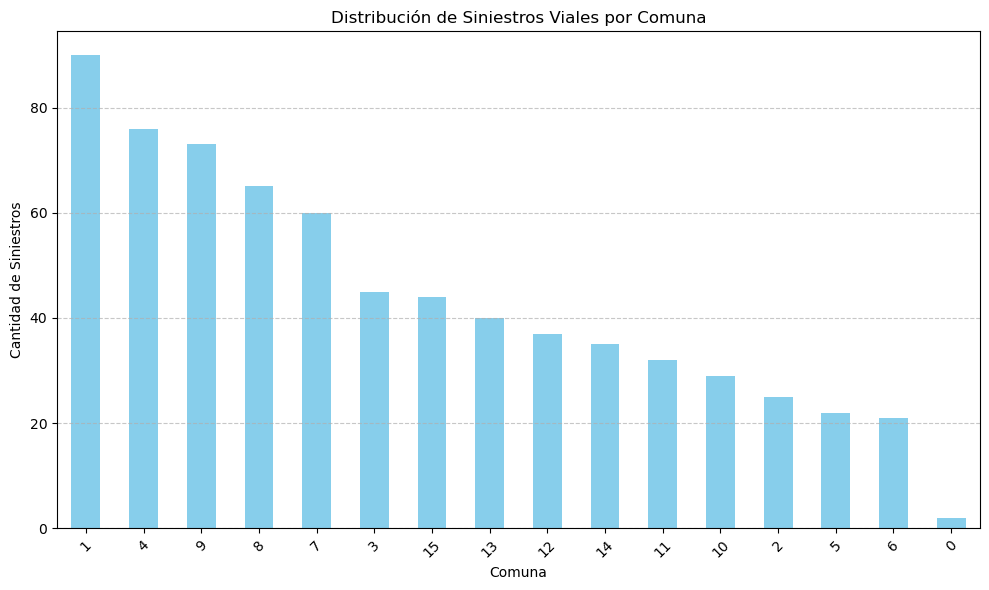

In [219]:
# Investigo distribución de siniestros por comuna.

siniestros_por_comuna = df_siniestros_hechos['comuna'].value_counts()

plt.figure(figsize=(10, 6))
siniestros_por_comuna.plot(kind='bar', color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.title('Distribución de Siniestros Viales por Comuna')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Análisis de la cantidad de víctimas por siniestro vial.

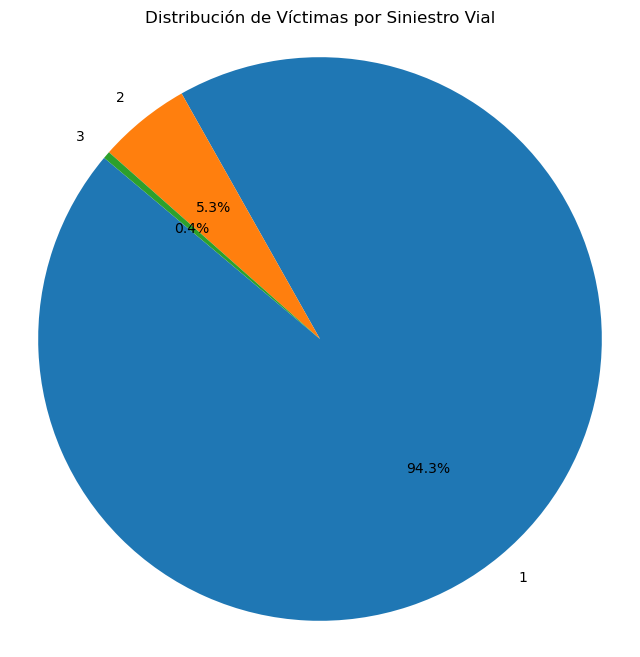

In [220]:
# Calculo la frecuencia de víctimas por siniestro.
frecuencia_victimas = df_siniestros['n_victimas'].value_counts()

# Visualizo distribución de víctimas por siniestro vial como gráfico de torta.
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_victimas, labels=frecuencia_victimas.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Víctimas por Siniestro Vial')
plt.axis('equal')  
plt.show()

# Identifico siniestros con un alto número de víctimas.
siniestros_altas_victimas = df_siniestros[df_siniestros['n_victimas'] > 5]  # Por ejemplo, siniestros con más de 5 víctimas


## Exploración de la ubicación de los siniestros viales.

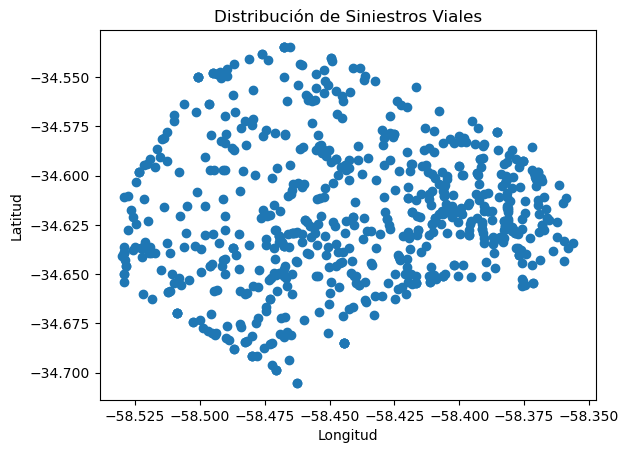

In [221]:
plt.scatter(df_siniestros_hechos['longitud'], df_siniestros_hechos['latitud'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Siniestros Viales')
plt.show()




## Análisis de participantes y roles en los siniestros.

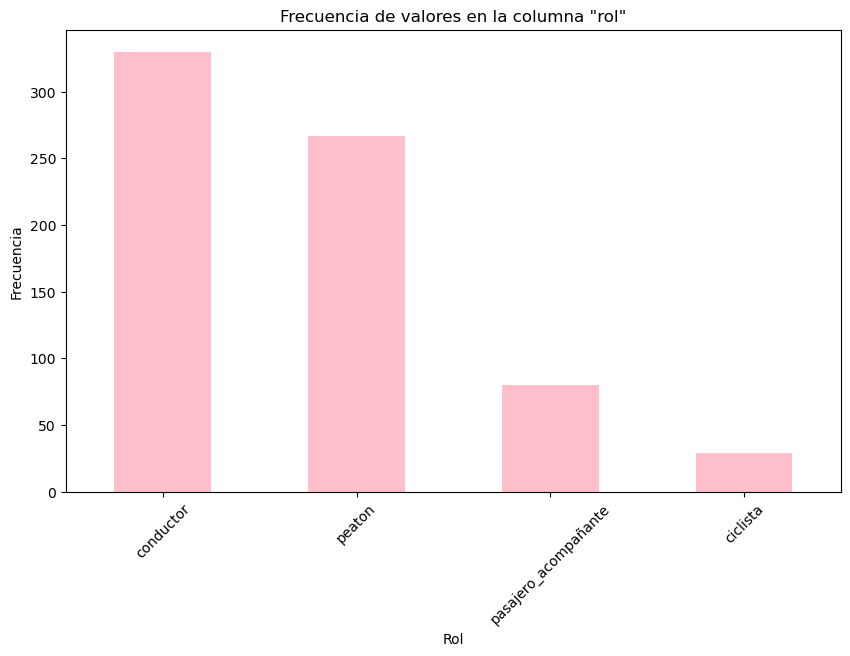

In [222]:
# Gráfico de barras para la frecuencia de valores en 'rol'
plt.figure(figsize=(10, 6))
df_siniestros['rol'].value_counts().plot(kind='bar', color='pink')
plt.title('Frecuencia de valores en la columna "rol"')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


## Exploración de características de las calles y lugares de los siniestros.

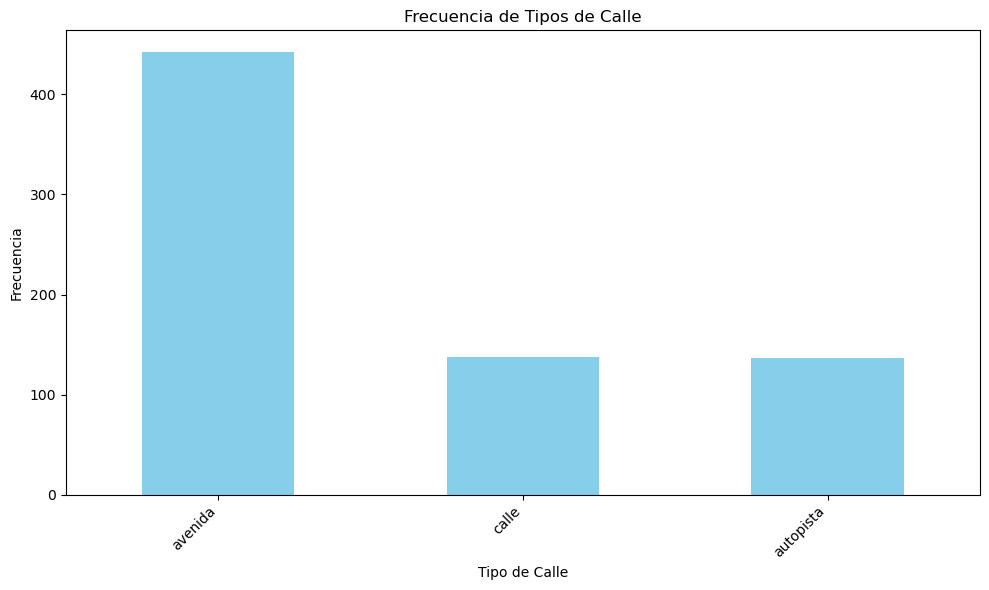

In [223]:
# Calculo la frecuencia de cada tipo de calle.
frecuencia_tipo_calle = df_siniestros['tipo_de_calle'].value_counts()

# Visualizo distribución de tipos de calle como un gráfico de barras.
plt.figure(figsize=(10, 6))
frecuencia_tipo_calle.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de Calle')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()


# Identifico características comunes de los lugares donde ocurren los siniestros
lugares_comunes = df_siniestros_hechos['comuna'].value_counts()


In [224]:
df_siniestros.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     717 non-null    object        
 1   n_victimas             717 non-null    int64         
 2   fecha                  717 non-null    datetime64[ns]
 3   hora                   717 non-null    int32         
 4   tipo_de_calle          717 non-null    object        
 5   dirección normalizada  708 non-null    object        
 6   comuna                 717 non-null    int64         
 7   longitud               704 non-null    float64       
 8   latitud                704 non-null    float64       
 9   victima_1              717 non-null    object        
 10  acusado                717 non-null    object        
 11  rol                    706 non-null    object        
 12  victima_2              708 non-null    object        
 13  sexo 